1. 📌 Cabeçalho / Introdução (Markdown)

# Análise de vendas do Supermercado
**Autor:** Kaique Vieira - FlexxTech
**Data:** 19/05/2025

## Objetivo
Descrever de forma clara o problema ou a pergunta que está sendo respondida com os dados.

## Contexto
Temos uma base de dados sobre as vendas de um supermercado, vamos alalisar o faturamento em produtos e filial para podermos alavancar as vendas nas filial dificitarias.

## Hipoteses ou Perguntas
- P1: Qual categoria ou produto gera mais receita?

- P2: Qual filial tem maior ticket médio?

- P3: Homens ou mulheres gastam mais por venda?

- P4: Alguma categoria tem alto valor, mas pouca venda? Ou o contrário?

- P5: A filial com mais vendas também é a mais lucrativa?

2. 📦 Importação de Bibliotecas (Código)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3. 📁 Carregamento dos Dados

In [12]:
df = pd.read_csv('sales.csv')
df.head()

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2


4. 🔎 Exploração Inicial (EDA - Exploratory Data Analysis)

## 📊 1. Análise Exploratória

- Verificar tipos de dados
- Procurar valores ausentes
- Estatísticas básicas
- Distribuição de variáveis
- Correlações

In [18]:
df.info() # Informações do df
df.describe() # Descição do df
df.isnull().sum() # Verificar se existe nulo em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

5. 🧹 Limpeza e Preparação dos Dados

## 🧼 2. Limpeza dos Dados

- Tratamento de valores nulos
- Conversão de tipos
- Remoção de outliers
- Criação de variáveis úteis

In [21]:
df.dropna(how='any')

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A,New York,Member,Female,Shampoo,Stationery,1.55,11,1.19,18.24,1
996,997,A,New York,Member,Male,Detergent,Personal Care,2.44,7,1.20,18.28,1
997,998,A,New York,Member,Female,Shampoo,Stationery,17.92,2,2.51,38.35,3
998,999,A,New York,Member,Female,Shampoo,Beverages,17.41,4,4.87,74.51,7


6. 📈 Análise ou Modelagem
## 📈 3. Análise Estatística / Modelagem

- Testes estatísticos
- Agrupamentos
- Regressões
- Classificações

# Qual categoria gera receita?

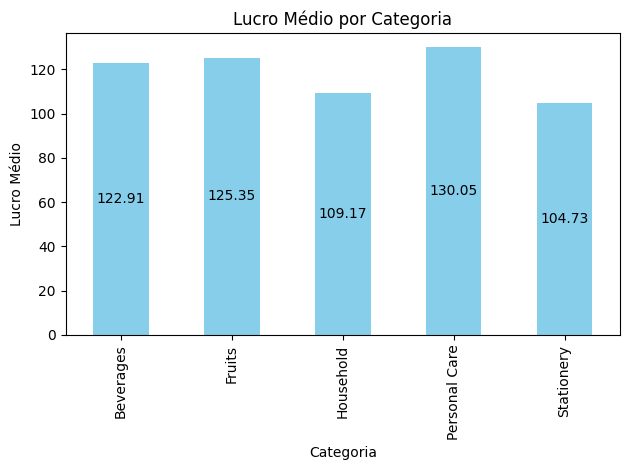

In [23]:
valor_medio_categoria = df.groupby('product_category')['total_price'].mean()
# Cria o gráfico de barras
ax = valor_medio_categoria.plot(kind="bar", color="skyblue")

# Adiciona os valores nas barras
for i, valor in enumerate(valor_medio_categoria):
    ax.text(i, valor / 2, f"{valor:.2f}", ha='center', va='center', color='black', fontsize=10)

# Opcional: Deixar mais bonito
plt.title("Lucro Médio por Categoria")
plt.ylabel("Lucro Médio")
plt.xlabel("Categoria")
plt.tight_layout()
plt.show()

# Qual filial tem o maior ticket medio?

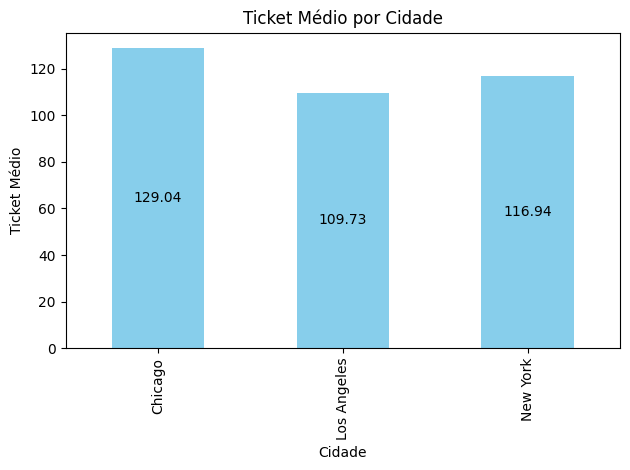

<Figure size 640x480 with 0 Axes>

In [45]:
ticket_medio_filial = df.groupby('city')['total_price'].mean()
ax = ticket_medio_filial.plot(kind="bar", color="skyblue")

# Adiciona os valores nas barras
for i, valor in enumerate(ticket_medio_filial):
    ax.text(i, valor / 2, f"{valor:.2f}", ha='center', va='center', color='black', fontsize=10)

# Opcional: Deixar mais bonito
plt.title("Ticket Médio por Cidade")
plt.ylabel("Ticket Médio")
plt.xlabel("Cidade")
plt.tight_layout()
plt.show()
plt.savefig('imgs/ticket_medio_cidade.png')

# Homem ou Mulher gasta mais por venda?

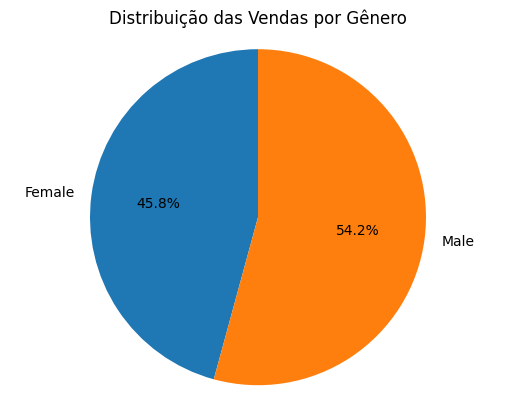

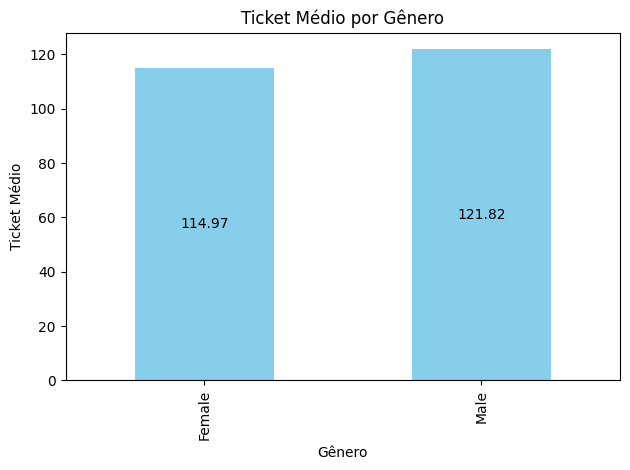

<Figure size 640x480 with 0 Axes>

In [47]:
venda_genero = df.groupby('gender')['total_price'].sum()
plt.pie(venda_genero,labels=venda_genero.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribuição das Vendas por Gênero")
plt.axis('equal') # Deixa o grafico circular
plt.show()

venda_media_genero = df.groupby("gender")["total_price"].mean()
ax = venda_media_genero.plot(kind="bar", color="skyblue")

# Adiciona os valores nas barras
for i, valor in enumerate(venda_media_genero):
    ax.text(i, valor / 2, f"{valor:.2f}", ha='center', va='center', color='black', fontsize=10)

# Opcional: Deixar mais bonito
plt.title("Ticket Médio por Gênero")
plt.ylabel("Ticket Médio")
plt.xlabel("Gênero")
plt.tight_layout()
plt.show()
plt.savefig('imgs/vendas_genero.png')


#  Alguma categoria tem alto valor e pouca venda? ou ao contrario?

                  ticket_medio  quantidade_vendas
product_category                                 
Personal Care       130.048942                208
Fruits              125.346651                209
Beverages           122.905455                187
Household           109.170909                198
Stationery          104.732879                198


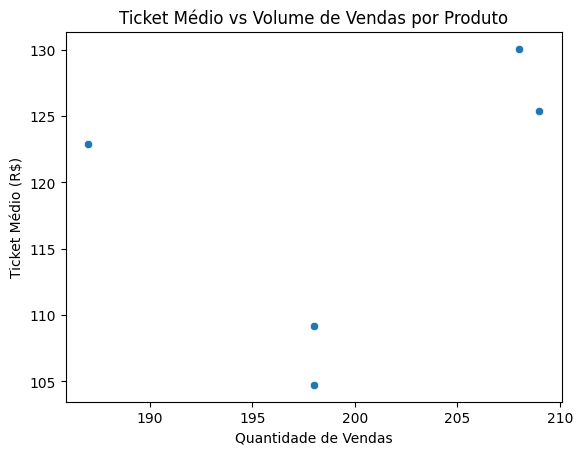

In [36]:
ticket_medio_produto = df.groupby("product_category")["total_price"].mean()
quantidade_vendas_produto = df.groupby("product_category")["sale_id"].count()
df_produtos = pd.DataFrame({
    "ticket_medio": ticket_medio_produto,
    "quantidade_vendas": quantidade_vendas_produto
})

# Ordenar do maior ticket para o menor volume
produtos_segmentados = df_produtos.sort_values(by=["ticket_medio", "quantidade_vendas"], ascending=[False, True])

# Visualizar os top 10 produtos com ticket alto e pouca venda
print(produtos_segmentados.head(10))

sns.scatterplot(data=df_produtos, x="quantidade_vendas", y="ticket_medio")
plt.title("Ticket Médio vs Volume de Vendas por Produto")
plt.xlabel("Quantidade de Vendas")
plt.ylabel("Ticket Médio (R$)")
plt.show()



# A filial com mais venda é mais lucrativa?

             lucro_total  quantidade_vendida  ticket_medio_unitario
city                                                               
New York        40226.93                3344              12.029584
Chicago         42584.71                3638              11.705528
Los Angeles     35772.26                3355              10.662373


array([<Axes: title={'center': 'lucro_total'}, xlabel='city'>,
       <Axes: title={'center': 'quantidade_vendida'}, xlabel='city'>],
      dtype=object)

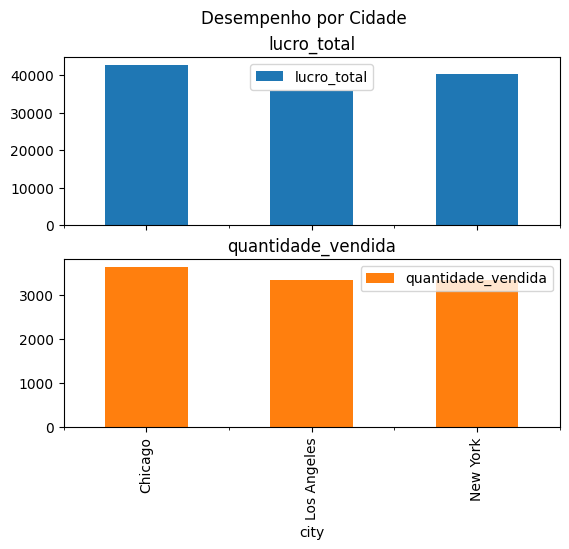

In [40]:
lucro_por_cidade = df.groupby("city")["total_price"].sum()
quantidade_vendas = df.groupby("city")["quantity"].sum()
df_resultado = pd.DataFrame({
    "lucro_total": lucro_por_cidade,
    "quantidade_vendida": quantidade_vendas
})
df_resultado["ticket_medio_unitario"] = df_resultado["lucro_total"] / df_resultado["quantidade_vendida"]
df_ordenado = df_resultado.sort_values(by=["ticket_medio_unitario", "quantidade_vendida"], ascending=[False, True])
print(df_ordenado.head(10))
df_resultado.plot(kind="bar", y=["lucro_total", "quantidade_vendida"], subplots=True, title="Desempenho por Cidade")




# Entre os gêneros, quem comprou mais da categoria 'Beverages'?”

In [41]:
bebidas = df[df["product_category"] == "Beverages"]
venda_bebidas_por_genero = bebidas.groupby("gender")["total_price"].sum()
print(venda_bebidas_por_genero)


gender
Female    11045.56
Male      11937.76
Name: total_price, dtype: float64


# Comparar por quantidade de itens vendidos, não valor:

In [ ]:
vendas_bebidas_quantidade = bebidas.groupby("gender")["quantity"].sum()
print(vendas_bebidas_quantidade)

gender
Female     937
Male      1015
Name: quantity, dtype: int64


# Comparar por número de compras (transações):

In [44]:
vendas_transacao_bebidas = bebidas.groupby("gender")["sale_id"].nunique()
print(vendas_transacao_bebidas)


gender
Female     85
Male      102
Name: sale_id, dtype: int64


7. 📌 Conclusões e Recomendações

## ✅ Conclusões

- P1: A categoria com mais receita foi a Personal Care e em seguida Fruits

- P2: A filial com mais ticket médio foi a de Chicago com U$129.4 de ticket médio

- P3: Homens gastam mais com um ticket médio de U$121.82 e a Mulheres com U$114.97. E podemos perceber com a analise que Homens tendem a comprar mais a categoria de Bebidas com um valor de U$11937.76 comprando 1015 unidades e 102 vendas.

- P4: Não tedas sao bem parelhas nas vendas tendo uma alta quantidade vendida e um ticket medio alto

- P5: Sim, a filial de Chicago é a mais lucriativa e com mais quantidades de itens vendidos

## 🧩 Próximos Passos

- Validar com mais dados.
- Integrar essa análise com dados de vendas futuras.
